A retail company “ABC Private Limit wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month.
The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

In [1]:
# import packages
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('C:\\Users\\Roma\\Downloads\\KAGGLE\\9.Black Friday\\train.csv')
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
data.shape

(550068, 12)

In [4]:
data.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [5]:
data.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [7]:
data.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [8]:
data.isna().sum()/data.shape[0]*100

User_ID                        0.000000
Product_ID                     0.000000
Gender                         0.000000
Age                            0.000000
Occupation                     0.000000
City_Category                  0.000000
Stay_In_Current_City_Years     0.000000
Marital_Status                 0.000000
Product_Category_1             0.000000
Product_Category_2            31.566643
Product_Category_3            69.672659
Purchase                       0.000000
dtype: float64

In [9]:
data.duplicated().sum()

0

# Find out total no. of transactions, no. of unique users using UserID, no. of unique products using ProductID.

In [10]:
print("Total no. of transactions -> {}".format(data.shape[0]))

unique_users = len(data.User_ID.unique())
print("Total unique users -> {}".format(unique_users))

unique_products = len(data.Product_ID.unique())
print("Total unique products -> {}".format(unique_products))

Total no. of transactions -> 550068
Total unique users -> 5891
Total unique products -> 3631


## Total Transactions by Age, Gender, Occupation, City and Years Stay In current City
### Questions :-
#### Which age group have done more transactions?
#### Have males done more transactions than females ?
#### Do users' occupation have any relation to number of transactions?
#### Do users who are living in the city more than 1 year have done more transactions?
#### Does category of city have any impact on purchase quantity? 
#### Does marital status is related to Black Friday purchase?

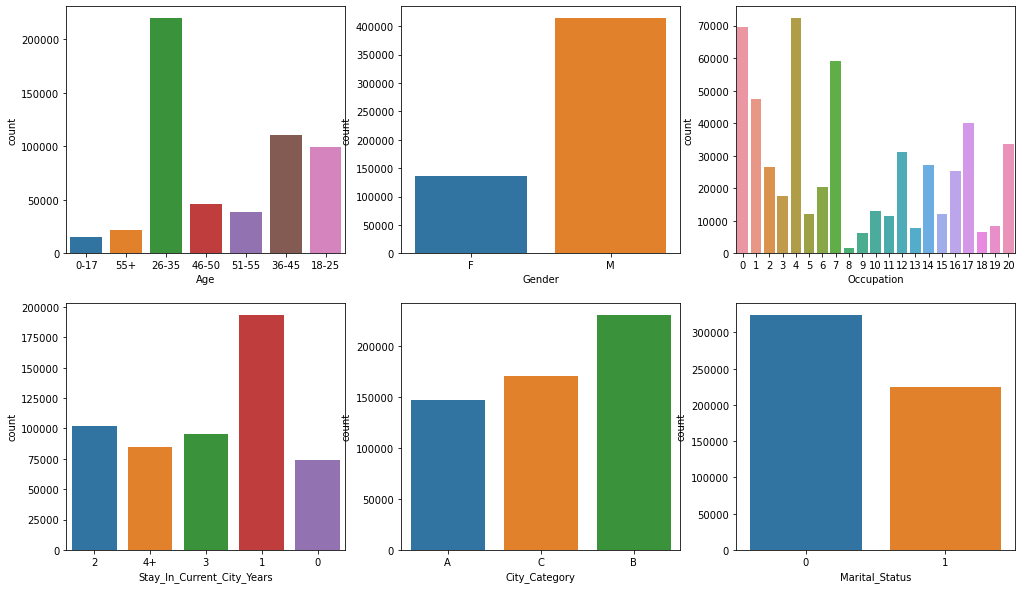

In [11]:
# Creating Count plots for Important categorical fields 
fig,axis = plt.subplots(nrows=2,ncols=3,figsize=(17,10))

sns.countplot(data["Age"],ax=axis[0,0])
sns.countplot(data["Gender"],ax=axis[0,1])
sns.countplot(data["Occupation"],ax=axis[0,2])
sns.countplot(data["Stay_In_Current_City_Years"],ax=axis[1,0])
sns.countplot(data["City_Category"],ax=axis[1,1])
sns.countplot(data["Marital_Status"],ax=axis[1,2])

### From Above Figures we can conclude that,

Conclusions :-

In figure 1, 26-35 age range have done more transactions.

In figure 2, Male users have done more transactions.

In figure 3, Users whose occupations are 0 and 4 have done more transactions.

In figure 4, Users who stayed in current city for 1 year have done more transactions.

In figure 5, Users from city category B have done more transactions.

In figure 6, Users who are not married yet have done more transactions.

## Total Purchasing Amount paid group by Age, Gender, Occupation, City , Years Stay In current City and marital status

#### Questions :-
#### Which age group have spent more in black friday?
#### Have females spent more than males ?
#### Do users' occupation have any relation on spending money at black friday?
#### Do users who are living in the city more than 1 year have spent more money?
#### Does category of city have any impact on total purchase amount?
#### Does marital status is related to the black friday?

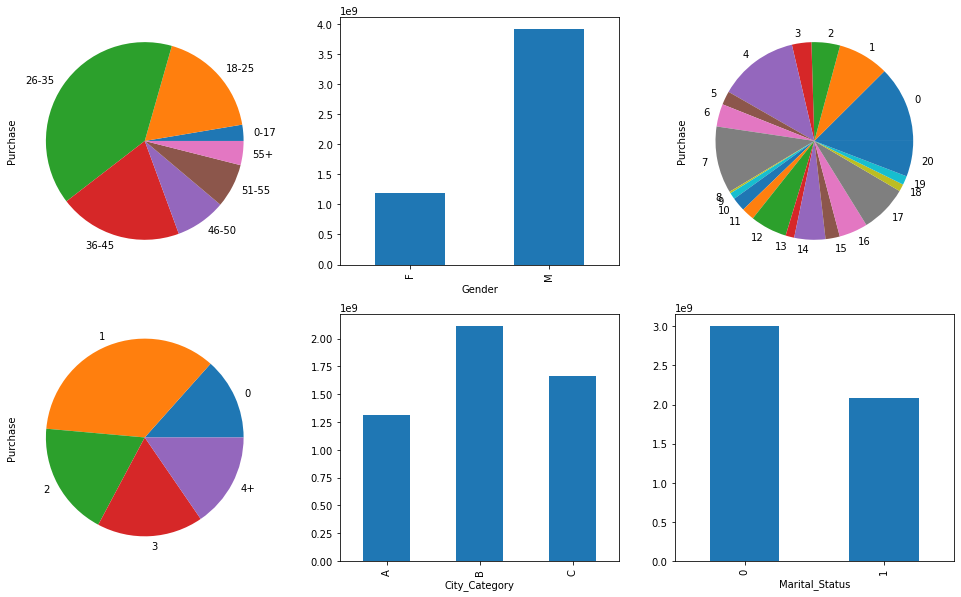

In [12]:
fig,axis = plt.subplots(nrows=2,ncols=3,figsize=(17,10))

data.groupby(["Age"])["Purchase"].sum().plot(kind='pie',ax=axis[0,0])
data.groupby(["Gender"])["Purchase"].sum().plot(kind='bar',ax=axis[0,1])
data.groupby(["Occupation"])["Purchase"].sum().plot(kind='pie',ax=axis[0,2])
data.groupby(["Stay_In_Current_City_Years"])["Purchase"].sum().plot(kind='pie',ax=axis[1,0])
data.groupby(["City_Category"])["Purchase"].sum().plot(kind='bar',ax=axis[1,1])
data.groupby(["Marital_Status"])["Purchase"].sum().plot(kind='bar',ax=axis[1,2])

Conclusions :-

In figure 1, 26-35 age range have spent more money.

In figure 2, Male users have spent more money.

In figure 3, Users whose occupations are 0 and 4 have spent more money.

In figure 4, Users who stayed in current city for 1 year have spent more money.

In figure 5, Users from city category B have spent more money.

In figure 6, Users who are not married yet have spent more money.

## Checking with Average values

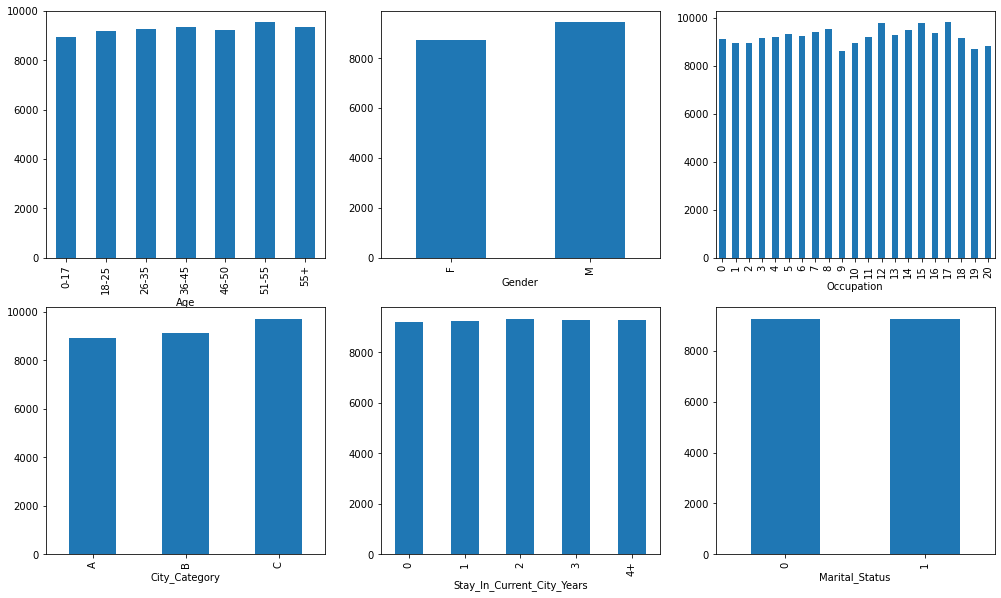

In [13]:
fig,axis = plt.subplots(nrows=2,ncols=3,figsize=(17,10))

data.groupby(['Age'])['Purchase'].mean().plot(kind='bar',ax=axis[0,0])
data.groupby(['Gender'])['Purchase'].mean().plot(kind='bar',ax=axis[0,1])
data.groupby(['Occupation'])['Purchase'].mean().plot(kind='bar',ax=axis[0,2])
data.groupby(['City_Category'])['Purchase'].mean().plot(kind='bar',ax=axis[1,0])
data.groupby(['Stay_In_Current_City_Years'])['Purchase'].mean().plot(kind='bar',ax=axis[1,1])
data.groupby(['Marital_Status'])['Purchase'].mean().plot(kind='bar',ax=axis[1,2])

https://www.kaggle.com/mayurdangar/blackfriday-insights-and-model

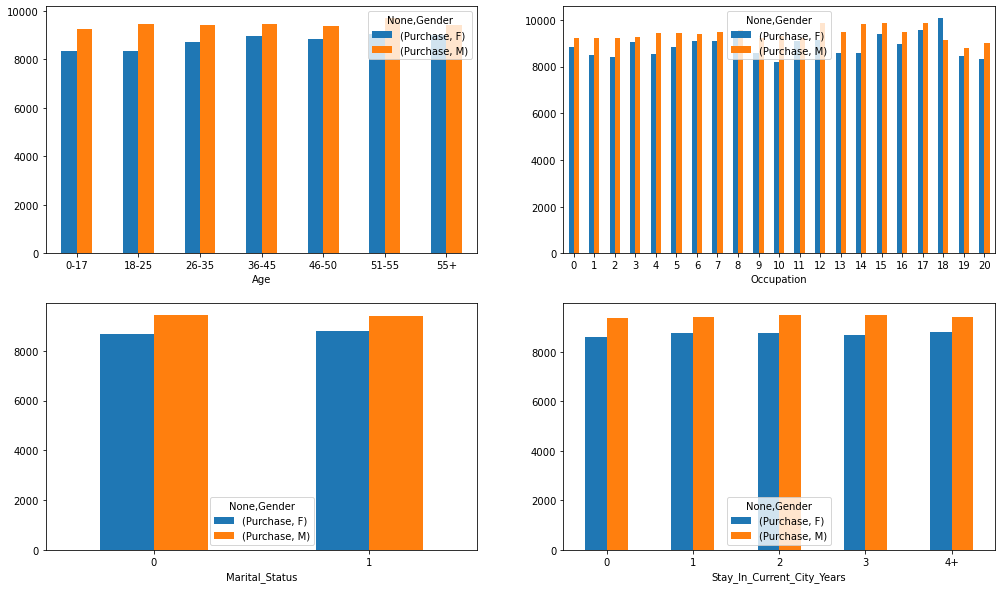

In [15]:
fig,axis = plt.subplots(nrows=2,ncols=2,figsize=(17,10))

data.groupby(["Age","Gender"])[["Purchase"]].mean().unstack().plot(kind='bar',rot=0, ax = axis[0,0])
data.groupby(["Occupation","Gender"])[["Purchase"]].mean().unstack().plot(kind='bar',rot=0, ax = axis[0,1])
data.groupby(["Marital_Status","Gender"])[["Purchase"]].mean().unstack().plot(kind='bar',rot=0, ax = axis[1,0])
data.groupby(["Stay_In_Current_City_Years","Gender"])[["Purchase"]].mean().unstack().plot(kind='bar',rot=0, ax = axis[1,1])

# Pairplot with numerical columns

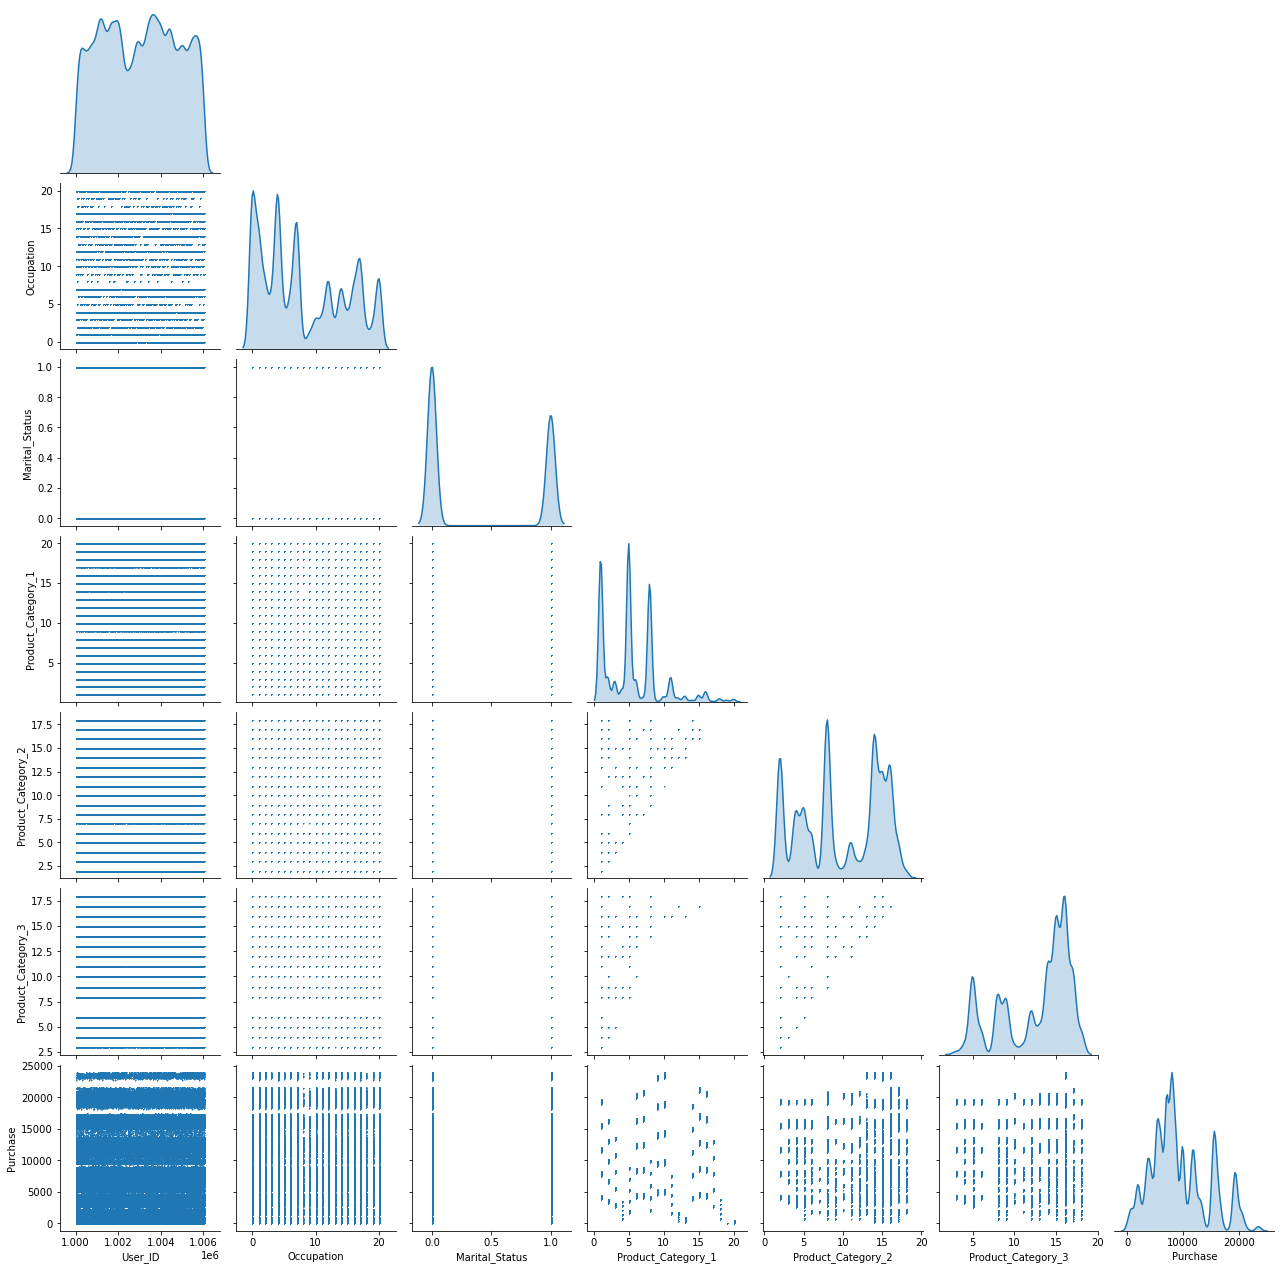

In [17]:
sns.pairplot(data,diag_kind="kde",corner=True,
             markers="+",
             plot_kws=dict(s=1, edgecolor="b", linewidth=1),
             diag_kws=dict(shade=True) )


Above Pairplot is not giving more good insights about the correlation between numeric values.
Also marital status and occupation fields are also being considered as those are in Numeric form.We need to change those fields to categorical type.

# Prepare the data

### Handle missing values

In [18]:
(data.isna().sum()*100/data.shape[0]).sort_values(ascending=False).to_frame().rename(columns={0:"Percentage of missing values"})

,Percentage of missing values
Product_Category_3,69.672659
Product_Category_2,31.566643
Purchase,0.000000
Product_Category_1,0.000000
Marital_Status,0.000000
Stay_In_Current_City_Years,0.000000
City_Category,0.000000
Occupation,0.000000
Age,0.000000
Gender,0.000000


## Product Categories
The product categories are categories of that particular product, if product belongs to more than one category , then there will be some values available for other product categories. So here we are dealing with very strange categorical feature.

In [19]:
data[["Product_Category_3","Product_Category_2"]] = data[["Product_Category_3","Product_Category_3"]].fillna(0)

In [20]:
data.isna().sum()*100/data.shape[0]

User_ID                       0.0
Product_ID                    0.0
Gender                        0.0
Age                           0.0
Occupation                    0.0
City_Category                 0.0
Stay_In_Current_City_Years    0.0
Marital_Status                0.0
Product_Category_1            0.0
Product_Category_2            0.0
Product_Category_3            0.0
Purchase                      0.0
dtype: float64

## Data Transformation
Now we don't have any Missing values, So we can transform our data and feed into the Machine learning model for training.
For Transformation :-
#### Categorical Fields :- We will use the label encoder to labelize all the categories.
#### Numeric Fields :- We can standardize the values based on standard scaler , and transform the data into mean = 0, std = 1, Btw it seems actually there is no need , as all the fields are somewhat categorical fields only.
Get two dataframes containing only Independent fields and only dependent field into new variables


In [21]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,0.0,0.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,14.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,0.0,0.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,0.0,0.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,0.0,0.0,7969


In [24]:
# Label Encoder Object
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

data["Age"] = le.fit_transform(data["Age"])
data["Stay_In_Current_City_Years"] = le.fit_transform(data["Stay_In_Current_City_Years"])
data["City_Category"] = le.fit_transform(data["City_Category"])
                                                           
# Remove Redundant columns
data_pro = data.drop(['User_ID','Product_ID'],axis=1)
print("Removed User_ID & Product_ID")
                                                           
data_pro = pd.get_dummies(data_pro) 
                                                           
x = data_pro.drop(columns=["Purchase"])
y = data_pro['Purchase'].values                                                          

Removed User_ID & Product_ID


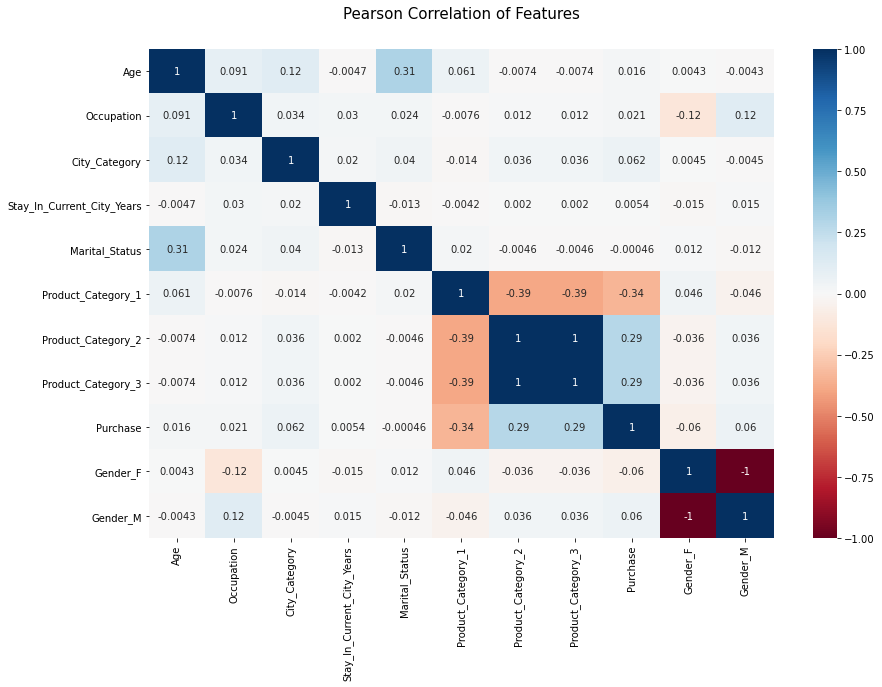

In [25]:
# CORRELATION BETWEEN THE VARIABLES
colormap = plt.cm.RdBu
plt.figure(figsize=(14,9))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(data_pro.corr(),
            vmin=-1,
            vmax=1,
            cmap='RdBu',
            annot=True)


# 4.Data Modelling

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.3, random_state = 42)

In [31]:
# LINEAR REGRESSION

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


LR=LinearRegression()
LR.fit(x_train,y_train)
pred_LR = LR.predict(x_test)
score_LR = r2_score(y_test, pred_LR)
error_LR = mean_squared_error(y_test, pred_LR)

In [44]:
score_LR, error_LR

(0.15006570304801736, 21420278.049078885)

In [32]:
# RANDOM FOREST

from sklearn.ensemble import RandomForestRegressor

RF=RandomForestRegressor()
RF.fit(x_train,y_train)
pred_RF = RF.predict(x_test)
score_RF = r2_score(y_test, pred_RF)
error_RF = mean_squared_error(y_test, pred_RF)

In [45]:
score_RF, error_RF

(0.6341777797773416, 9219552.26633643)

In [39]:
# RANDOM FOREST WITH PARAMETERS

RF_p = RandomForestRegressor(max_depth=8,min_samples_split=4,min_samples_leaf=2,random_state=142)

RF_p.fit(x_train,y_train)
pred_RF_p = RF_p.predict(x_test)
score_RF_p = r2_score(y_test, pred_RF_p)
error_RF_p = mean_squared_error(y_test, pred_RF_p)

In [46]:
score_RF_p, error_RF_p

(0.6441418496628707, 8968435.035023496)